### Sales Prediction
(Simple Linear Regression)

**Name:** Adiel Delgado Silva

#### Import Libraries

In [1]:
# Data Manipulation

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Linear Regression
from sklearn.linear_model import LinearRegression

# Sample split
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#### Import the Dataset

In [2]:
df = pd.read_csv("Salary_dataset.csv")

#### Data Inspection

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


#### Exploratory Data Analysis


##### Outlier Analysis

<Axes: ylabel='Salary'>

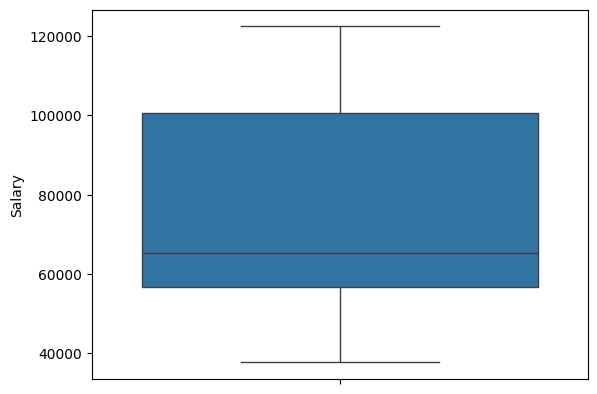

In [6]:
#Realiza cuanta dispersion hay en los datos
#Usando un Boxplot
sns.boxplot(df["Salary"])

<Axes: ylabel='YearsExperience'>

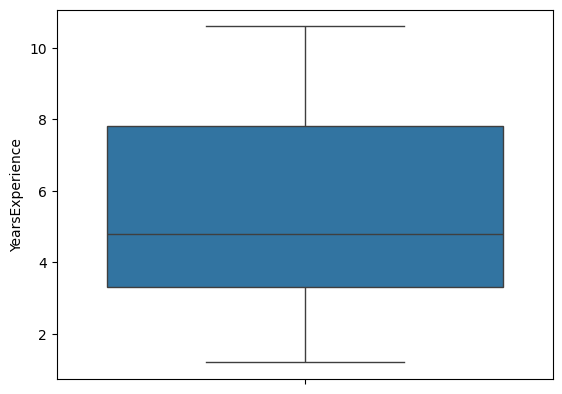

In [7]:
sns.boxplot(df["YearsExperience"])

##### Correlation Analysis

<Axes: xlabel='YearsExperience', ylabel='Salary'>

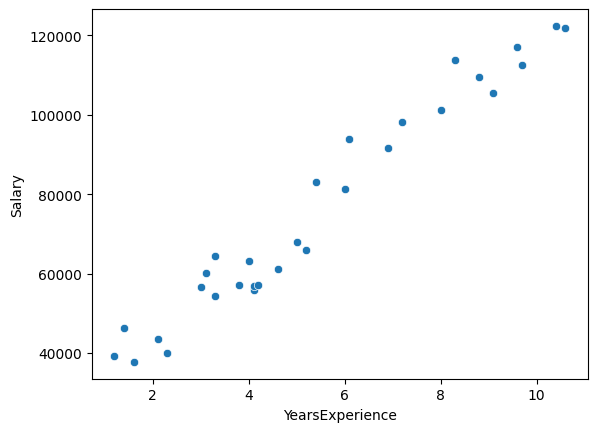

In [8]:
sns.scatterplot(df, x=df["YearsExperience"], y=(df["Salary"]))

#### Building the model

##### Separating predictor and target

In [9]:
X = df[["YearsExperience"]]
y = df[["Salary"]]

##### Train-Test split

In [10]:
#Entrenar el modelo con datos que nunca se han usado.
#Generaliza usando un split, para asi poder predecir que hacer en casos no vistos.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)
#Se entrenara con el 70% de los datos y se usaran el 30% restante para probarlo.

In [11]:
X_train.shape

(21, 1)

In [12]:
y_train.shape

(21, 1)

##### Train the model

In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### Evaluate the model with training data

In [14]:
y_pred = model.predict(X_train)
y_pred

array([[ 88997.38786411],
       [ 71362.70756818],
       [ 36093.34697631],
       [ 63009.43795432],
       [ 63009.43795432],
       [106632.06816005],
       [ 55584.30940866],
       [ 53728.02727225],
       [121482.32525136],
       [ 39805.91124914],
       [ 67650.14329535],
       [ 60225.0147497 ],
       [ 52799.88620404],
       [ 63937.57902252],
       [ 80644.11825025],
       [114057.19670571],
       [ 37949.62911273],
       [ 99206.93961439],
       [ 62081.29688611],
       [ 46302.89872659],
       [114985.33777391]])

In [15]:
mse = mean_squared_error(y_train,y_pred)
r2 = r2_score(y_train, y_pred)
#Que tanto se diferencian los valores predecidos con el real
print("MSE: ", mse)
#Muestra el valor en porcentaje de accuracy
print("R2: ", r2)

MSE:  23544267.893499397
R2:  0.9657972432750076


##### Evaluate the model with Test data

In [16]:
y_pred = model.predict(X_test)
y_pred

array([[109416.49136467],
       [ 55584.30940866],
       [ 75075.27184101],
       [ 73218.98970459],
       [ 81572.25931846],
       [101991.36281901],
       [123338.60738778],
       [ 91781.81106874],
       [ 44446.61659018]])

In [17]:
#Ahora se usan los datos con los que se probó el modelo
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
#Que tanto se diferencian los valores predecidos con el real
print("MSE: ", mse)
#Muestra el valor en porcentaje de accuracy
print("R2: ", r2)

MSE:  52197080.56204069
R2:  0.9198311888436188


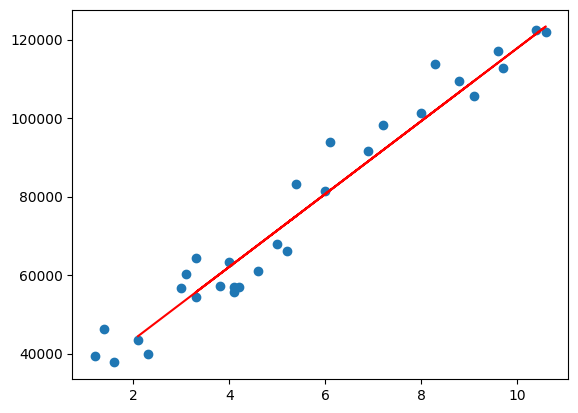

In [18]:
plt.scatter(X,y)
plt.plot(X_test, y_pred, color="red")